# TSAI Assignment 10

Import Headers

In [1]:
from __future__ import print_function
from utils import torch,nn,F,optim,datasets,transforms
import utils
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Get the custom resnet model

In [2]:
import custom_resnet
loss_criterion = F.cross_entropy
max_lr= 4.51E-02
lr = 0.01
model = custom_resnet.getModel(loss_criterion, lr)

C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


Use the lightning magic to train your model

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


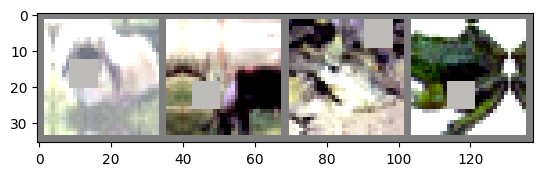

dog   deer  frog  frog 


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                 | Type               | Params
------------------------------------------------------------
0 | accuracy             | MulticlassAccuracy | 0     
1 | convblockPreparation | Sequential         | 1.9 K 
2 | convblockL1X1        | Sequential         | 74.0 K
3 | convblockL1R1        | Sequential         | 295 K 
4 | convblockL2X1        | Sequential         | 295 K 
5 | convblockL3X1        | Sequential         | 1.2 M 
6 | convblockL3R1        | Sequential         | 4.7 M 
7 | FinalBlock           | Sequential         | 0     
8 | FC                   | Sequential         | 5.1 K 
9 | dropout              | Dropout            | 0     
------------------------------------------------------------
6.6 M     Trainable params
0         Non-trainable params
6.6 M     Total params
26.293    Total estimated model params size (MB)


Epoch 0:   0%|                                                                                  | 0/88 [00:00<?, ?it/s]

C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\autograd\__init__.py:200: UserWarning: Error detected in LogSoftmaxBackward0. Traceback of forward call that caused the error:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start()
  File "C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\SToleti\AppData\Local\Program

RuntimeError: Function 'LogSoftmaxBackward0' returned nan values in its 0th output.

In [3]:
from pytorch_lightning import Trainer
from pytorch_lightning.tuner import Tuner
AVAIL_GPUS = min(1, torch.cuda.device_count())
trainer = Trainer(
    accelerator = 'gpu',
    max_epochs = 24,
    precision = '16-mixed',
    gradient_clip_val=max_lr, gradient_clip_algorithm="value",
    detect_anomaly=True
)

# 2. Create the Tuner
#tuner = Tuner(trainer)
#tuner.auto_lr_find = True


# Fit model
trainer.fit(model) #train_loader,test_loader

In [ ]:
trainer.test(model)

In [ ]:
!pip install lightning tensorboardX